In [11]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/christoph/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
df_path = '../Data/movies_df.csv'

In [13]:
df = pd.read_csv(df_path)

In [14]:
df['overview'][:5]

0    The story follows Carol Danvers as she becomes...
1    As Hiccup fulfills his dream of creating a pea...
2    When Alita awakens with no memory of who she i...
3    After being defeated by Ip Man, Cheung Tin Chi...
4    Gellert Grindelwald has escaped imprisonment a...
Name: overview, dtype: object

## Clean data

In [15]:
def clean(text): # use regular expression to remove specific characters
    text = re.sub("\'", " ", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [16]:
df['clean_overview'] = df['overview'].astype(str).apply(lambda x: clean(x))

In [17]:
df.head()

,id,title,release_date,overview,Family,Animation,History,Documentary,Adventure,Western,...,Romance,War,Mystery,Fantasy,Action,TV Movie,Thriller,Comedy,Music,clean_overview
0,299537,Captain Marvel,2019-03-06,The story follows Carol Danvers as she becomes...,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,the story follows carol danvers as she becomes...
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,As Hiccup fulfills his dream of creating a pea...,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,as hiccup fulfills his dream of creating a pea...
2,399579,Alita: Battle Angel,2019-01-31,When Alita awakens with no memory of who she i...,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,when alita awakens with no memory of who she i...
3,450001,Master Z: Ip Man Legacy,2018-12-20,"After being defeated by Ip Man, Cheung Tin Chi...",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,after being defeated by ip man cheung tin chi ...
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,Gellert Grindelwald has escaped imprisonment a...,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,gellert grindelwald has escaped imprisonment a...


In [18]:
def word_counts(text, terms):
    all_words = ' '.join([t for t in text]) 
    all_words = all_words.split() 
    
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  
  
    d = words_df.nlargest(columns="count", n = terms) 
  
    plt.figure(figsize=(20,30)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

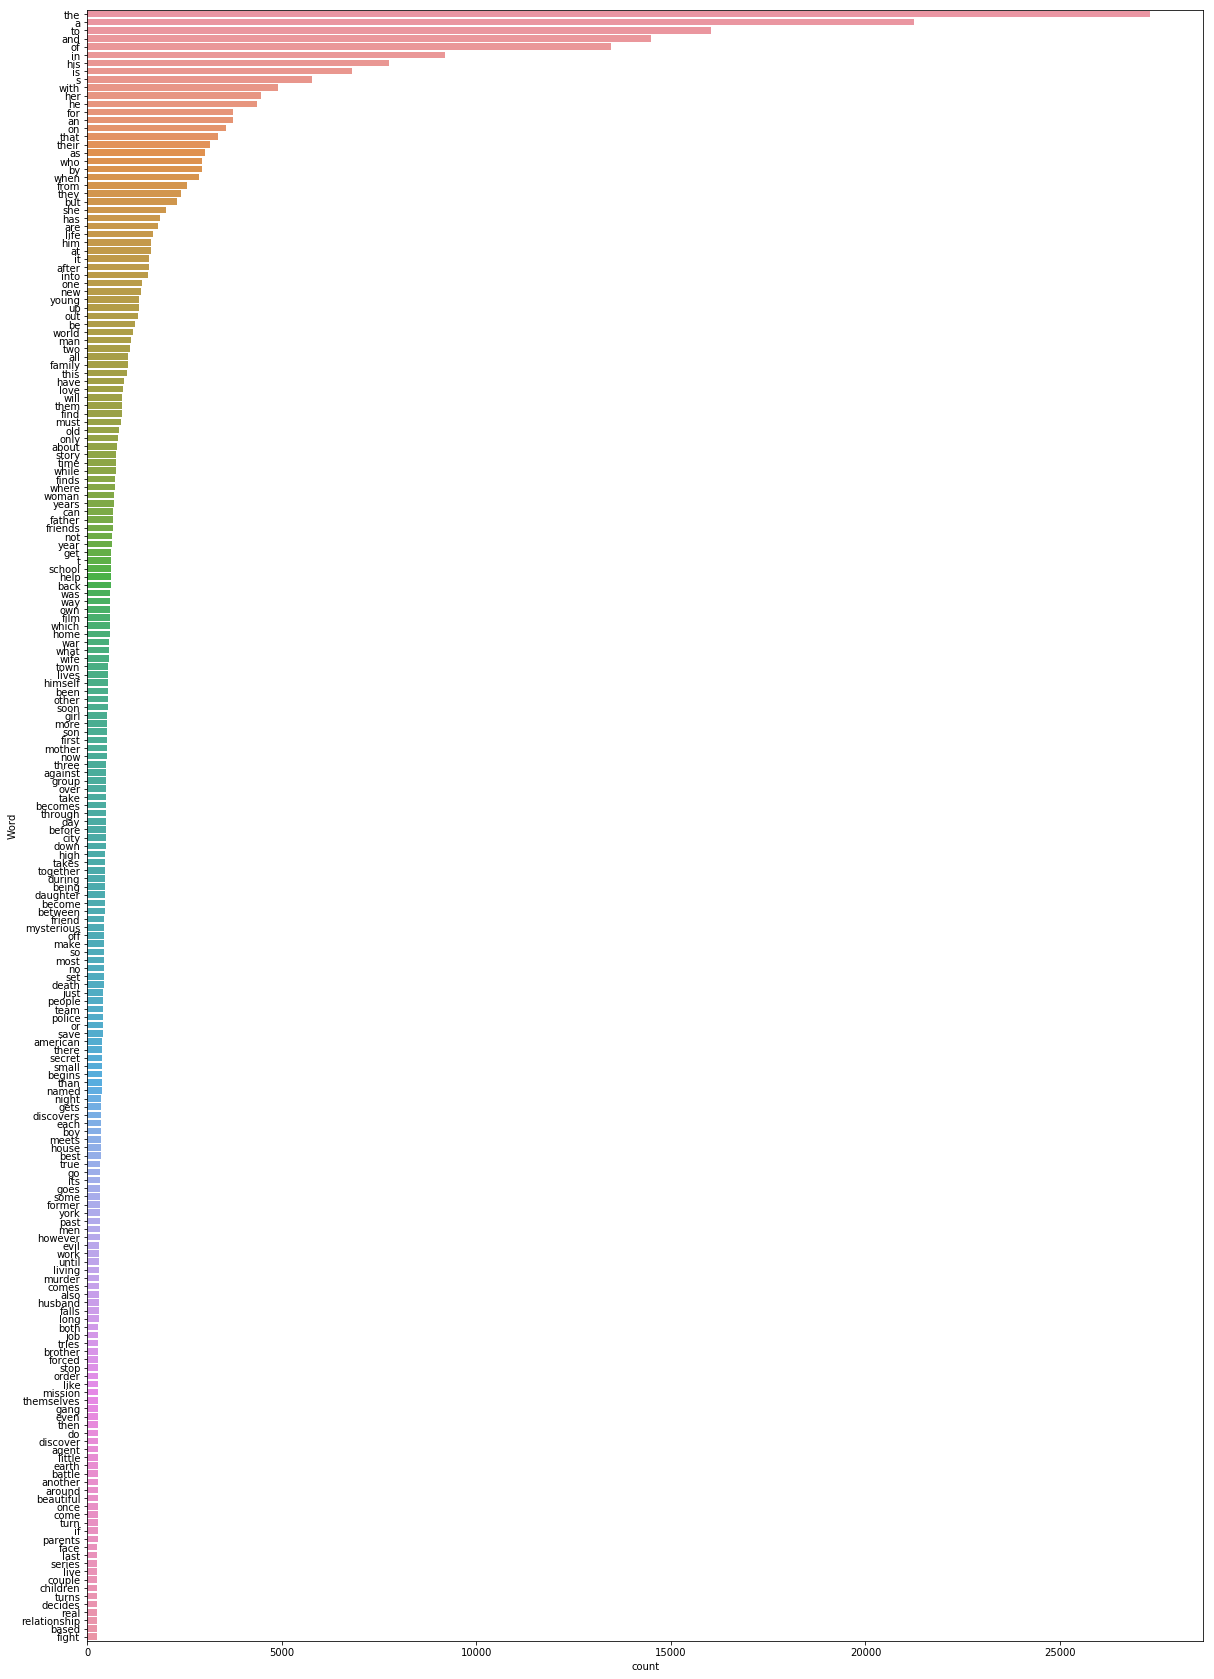

In [19]:
word_counts(df['clean_overview'], 200)

In [20]:
stpwrds = set(nltk.corpus.stopwords.words('english'))

In [21]:
def remove_stops(text):
    cleaned = [w for w in text.split() if not w in stpwrds]
    return ' '.join(cleaned)

In [22]:
df['clean_overview'] = df['clean_overview'].astype(str).apply(lambda x: remove_stops(x))

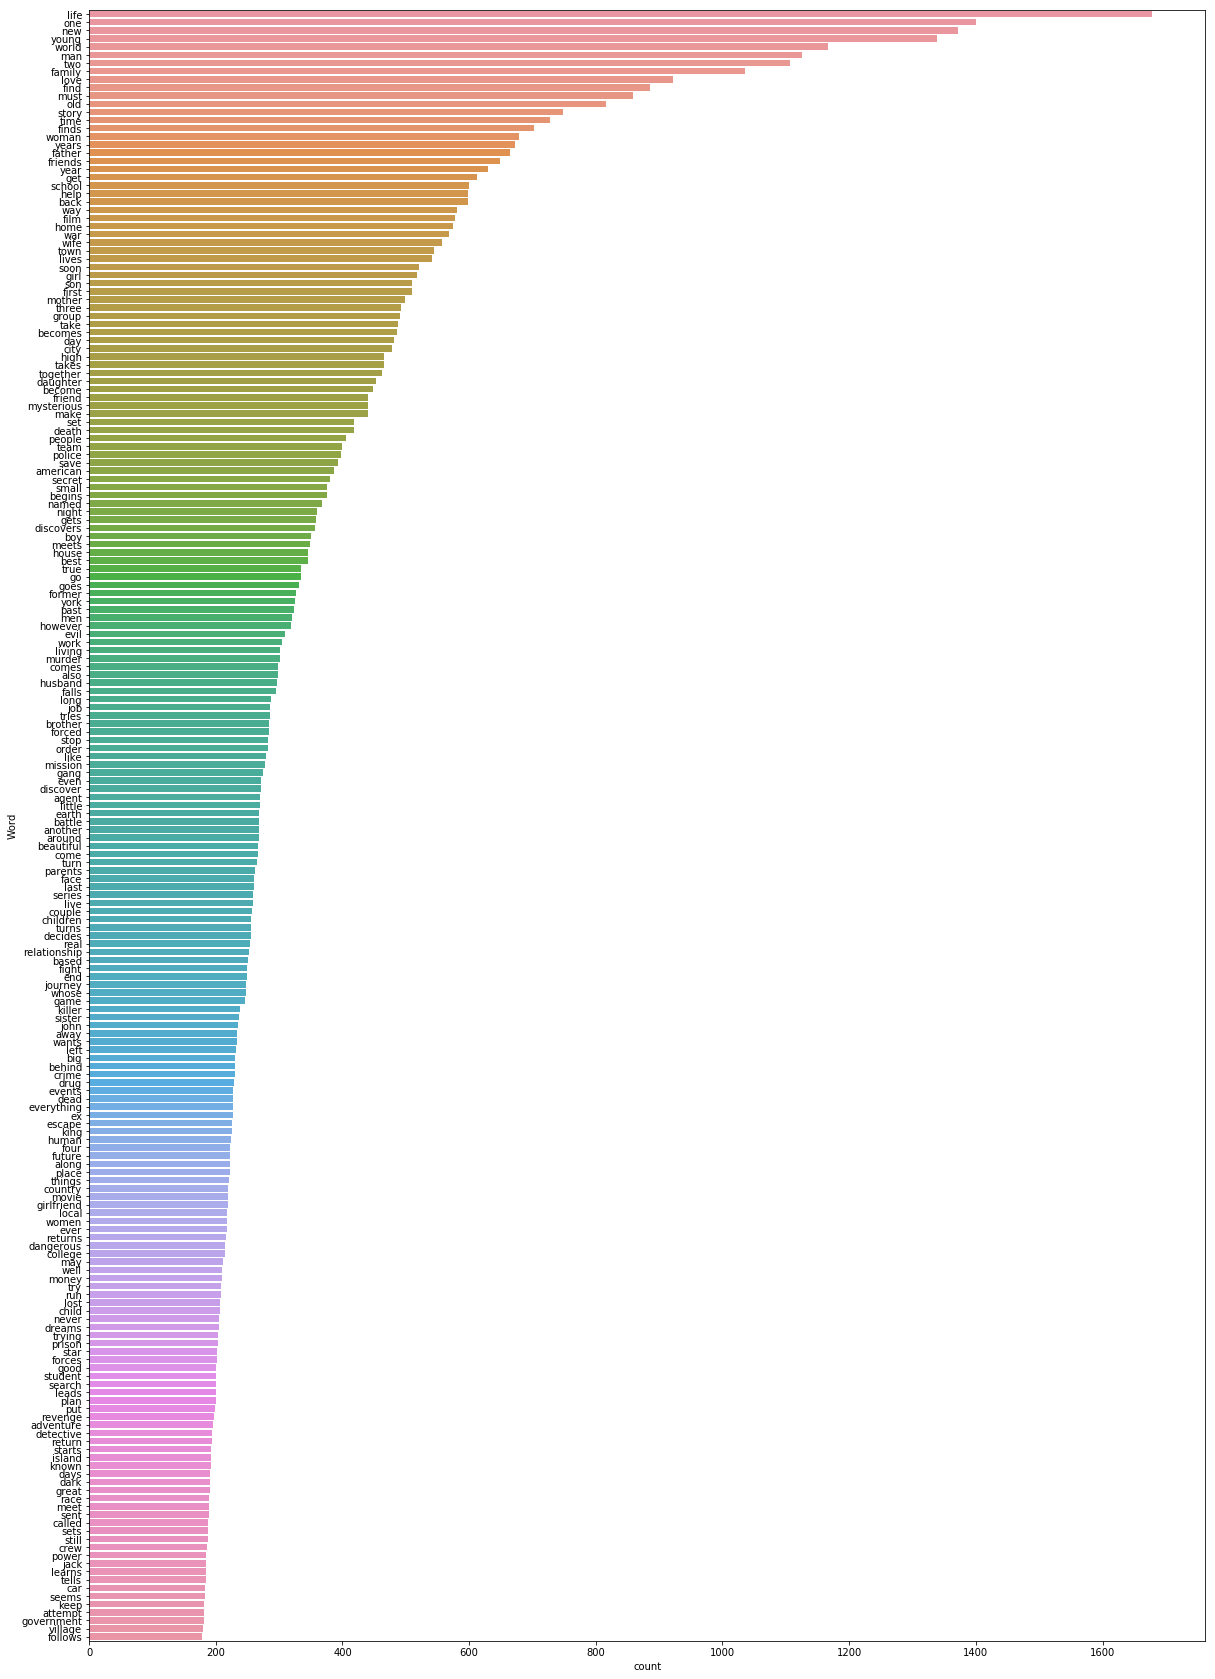

In [23]:
word_counts(df['clean_overview'], 200)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [27]:
df.columns

Index(['id', 'title', 'release_date', 'overview', 'Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music', 'clean_overview'],
      dtype='object')

In [28]:
X = df['clean_overview']
y = df[['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
tfidf_xtrain = tfidf_vectorizer.fit_transform(X_train)

In [31]:
tfidf_xtest = tfidf_vectorizer.transform(X_test)

In [32]:
from sklearn.svm import SVC

from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report

In [33]:
model = OneVsRestClassifier(SVC(gamma = 'auto',kernel = 'linear'))

In [34]:
model.fit(tfidf_xtrain, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [35]:
predictions = model.predict(tfidf_xtest)

In [36]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.24      0.81      0.37       106
           1       0.19      0.88      0.31        59
           2       0.03      0.57      0.05         7
           3       0.16      0.80      0.26        10
           4       0.23      0.68      0.34       173
           5       0.03      1.00      0.06         2
           6       0.29      0.70      0.41       193
           7       0.63      0.67      0.65      1456
           8       0.37      0.77      0.50       190
           9       0.29      0.85      0.43       124
          10       0.30      0.67      0.41       250
          11       0.24      0.81      0.36        31
          12       0.06      0.74      0.12        23
          13       0.14      0.76      0.24        63
          14       0.43      0.75      0.55       445
          15       0.00      0.00      0.00         0
          16       0.40      0.69      0.51       520
          17       0.54    

/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/hom

### Trying something different for classifiers

In [37]:
cm = df.loc[0]

In [38]:
ls = df.loc[1]

In [39]:
def make_genre_list(s):
    genre_list = ['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']
    gen = []
    for g in genre_list:
        if s.loc[g] == 1:
            gen.append(g)
    return gen

In [40]:
make_genre_list(cm)

['Adventure', 'Science Fiction', 'Action']

In [41]:
make_genre_list(ls)

['Family', 'Animation', 'Adventure']

In [42]:
df['genre_list'] = df.apply(lambda row : make_genre_list(row), axis = 1)

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer

In [44]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['genre_list'])


y = multilabel_binarizer.transform(df['genre_list'])

In [45]:
X = df['clean_overview']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tfidf_xtrain = tfidf_vectorizer.fit_transform(X_train)
tfidf_xtest = tfidf_vectorizer.transform(X_test)

In [47]:
model = OneVsRestClassifier(SVC(gamma = 'auto', kernel = 'linear'))

In [48]:
model.fit(tfidf_xtrain, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [49]:
predictions = model.predict(tfidf_xtest)

In [50]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55       445
           1       0.23      0.68      0.34       173
           2       0.19      0.88      0.31        59
           3       0.54      0.68      0.60       888
           4       0.29      0.70      0.41       193
           5       0.16      0.80      0.26        10
           6       0.63      0.67      0.65      1456
           7       0.24      0.81      0.37       106
           8       0.14      0.76      0.24        63
           9       0.03      0.57      0.05         7
          10       0.37      0.77      0.50       190
          11       0.08      0.67      0.15        12
          12       0.06      0.74      0.12        23
          13       0.30      0.67      0.41       250
          14       0.29      0.85      0.43       124
          15       0.00      0.00      0.00         0
          16       0.40      0.69      0.51       520
          17       0.24    

/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/christoph/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/hom

In [56]:
len(y_test)

3289

In [55]:
len(predictions)

3289

In [75]:
true = 0
false = 0
pred = []
test = []
for index, row in enumerate(y_test):
    if np.any(row & predictions[index]):
        pred.append(True)
        test.append(True)
    else:
        pred.append(False)
        test.append(True)
        
    
    

In [180]:
from sklearn.linear_model import LogisticRegression

In [185]:
logovr = OneVsRestClassifier(LogisticRegression())

In [186]:
logovr.fit(tfidf_xtrain, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [188]:
predicted = logovr.predict(tfidf_xtest)

In [189]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08        15
           1       0.01      1.00      0.02         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.09      0.77      0.16        61
           5       0.00      0.00      0.00         0
           6       0.12      0.69      0.21        85
           7       0.62      0.69      0.65      1372
           8       0.10      0.97      0.18        40
           9       0.13      0.96      0.23        49
          10       0.14      0.81      0.24       100
          11       0.03      1.00      0.06         3
          12       0.01      1.00      0.02         3
          13       0.03      1.00      0.06        11
          14       0.24      0.85      0.37       217
          15       0.00      0.00      0.00         0
          16       0.24      0.78      0.37       274
          17       0.40    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classific

In [235]:
mbi = multilabel_binarizer.inverse_transform(predicted)


In [230]:
y_test_df = pd.DataFrame()
y_test_df['genres'] = y_test.apply(lambda row : make_genre_list(row), axis = 1)

In [237]:
ytgenres = list(y_test_df['genres'])

In [240]:
for i in range(len(mbi)):
    print(f'{mbi[i]}\t\t\t\t{ytgenres[i]}')

('Family',)				['Drama']
('Family',)				['Documentary', 'Drama']
('Thriller',)				['Drama', 'Science Fiction', 'Thriller']
()				['Adventure', 'Drama', 'Science Fiction', 'Action']
()				['Action', 'Thriller']
('Science Fiction',)				['Adventure', 'Fantasy', 'Action']
()				['History', 'Drama', 'War', 'Action', 'Thriller']
('Family',)				['Crime', 'Drama']
('War',)				['Adventure', 'Comedy']
('Family',)				['Drama']
('Family', 'Horror', 'War')				['Romance', 'Comedy']
()				['Comedy']
()				['Horror', 'Action', 'Thriller']
()				['Family', 'Animation', 'Comedy']
('Fantasy',)				['Horror']
('Science Fiction', 'Thriller')				['Action', 'Thriller']
('Family',)				['Drama']
('Family',)				['Drama', 'Romance']
('Family', 'War')				['Drama', 'Comedy']
()				['Horror', 'Action', 'Thriller']
()				['Horror', 'Science Fiction', 'Action']
('War',)				['Family', 'Animation', 'Adventure', 'Fantasy', 'Comedy']
('Thriller',)				['Crime', 'Action', 'Thriller']
('Family',)				['History', 'Drama', 'War

('Family', 'Thriller')				['Crime', 'Drama', 'Mystery', 'Thriller']
('War',)				['Drama', 'Horror']
('Science Fiction', 'Thriller')				['Adventure', 'Crime', 'Action', 'Thriller', 'Comedy']
()				['Animation', 'Science Fiction', 'Action']
('War',)				['Thriller', 'Comedy']
('Fantasy', 'Thriller')				['Horror', 'Thriller']
('Family',)				['Crime', 'Mystery', 'Action', 'Thriller']
('Family',)				['Crime', 'Drama', 'Mystery']
()				['Drama', 'Science Fiction', 'Romance', 'Comedy']
('Science Fiction',)				['Action']
()				['Adventure', 'Action', 'Comedy']
('Action', 'Crime')				['Family', 'Animation', 'Adventure']
('Family',)				['Drama', 'Horror', 'Thriller']
('Family',)				['Animation', 'Adventure', 'Fantasy', 'Action']
()				['Horror', 'Comedy']
('Family',)				['History', 'Adventure', 'Drama', 'Action']
('Family',)				['Drama', 'Romance', 'War']
('Science Fiction',)				['Animation', 'Adventure', 'Action', 'Comedy', 'Music']
('Drama', 'Science Fiction', 'Thriller')				['Science Fiction',

('Family', 'Thriller')				['Horror', 'Thriller']
()				['Drama', 'Action']
('Science Fiction',)				['Action', 'Comedy']
()				['Family', 'Animation', 'Adventure']
('Family',)				['Drama', 'Romance', 'Comedy']
()				['Horror', 'Mystery', 'Thriller']
('Fantasy', 'War')				['Horror', 'Comedy']
()				['Animation', 'Action']
('Family', 'War')				['Drama', 'Comedy']
('Family',)				['Drama']
('Fantasy',)				['Drama', 'Horror']
('Drama', 'Thriller')				['Adventure', 'Mystery', 'Action', 'Thriller']
('Family', 'Thriller')				['Horror', 'Thriller']
('Science Fiction', 'Thriller')				['Adventure', 'Crime', 'Action']
('War',)				['Crime', 'Drama', 'Mystery', 'Thriller', 'Comedy']
('Family',)				[]
()				['Horror', 'Comedy']
('War',)				['Drama', 'Action']
('War',)				['Crime', 'Comedy']
('War',)				['Family', 'Science Fiction', 'Comedy']
('Adventure', 'Crime')				['Family', 'Animation', 'Adventure', 'Fantasy', 'Action', 'Comedy']
('Drama', 'Family', 'Thriller')				['Drama']
('Family',)				['Drama'

In [241]:
df.head()           

,id,title,release_date,overview,Family,Animation,History,Documentary,Adventure,Western,...,Romance,War,Mystery,Fantasy,Action,TV Movie,Thriller,Comedy,Music,clean_overview
0,299537,Captain Marvel,2019-03-06,The story follows Carol Danvers as she becomes...,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,story follows carol danvers becomes one univer...
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,As Hiccup fulfills his dream of creating a pea...,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,hiccup fulfills dream creating peaceful dragon...
2,399579,Alita: Battle Angel,2019-01-31,When Alita awakens with no memory of who she i...,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,alita awakens memory future world recognize ta...
3,450001,Master Z: Ip Man Legacy,2018-12-20,"After being defeated by Ip Man, Cheung Tin Chi...",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,defeated ip man cheung tin chi attempting keep...
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,Gellert Grindelwald has escaped imprisonment a...,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,gellert grindelwald escaped imprisonment begun...


In [242]:
genre_df = df[['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']]

In [246]:
genre_counts = genre_df.apply(pd.Series.value_counts)

In [248]:
genre_counts = genre_counts.loc[1]

In [253]:
gct = genre_counts.transpose()

In [261]:
gct = pd.DataFrame(gct)

In [263]:
gct.columns

Int64Index([1], dtype='int64')

In [267]:
gct = gct.reset_index()

In [271]:
gct.columns

Index(['index', 1], dtype='object')

In [272]:
gct.columns = ['genres', 'count']

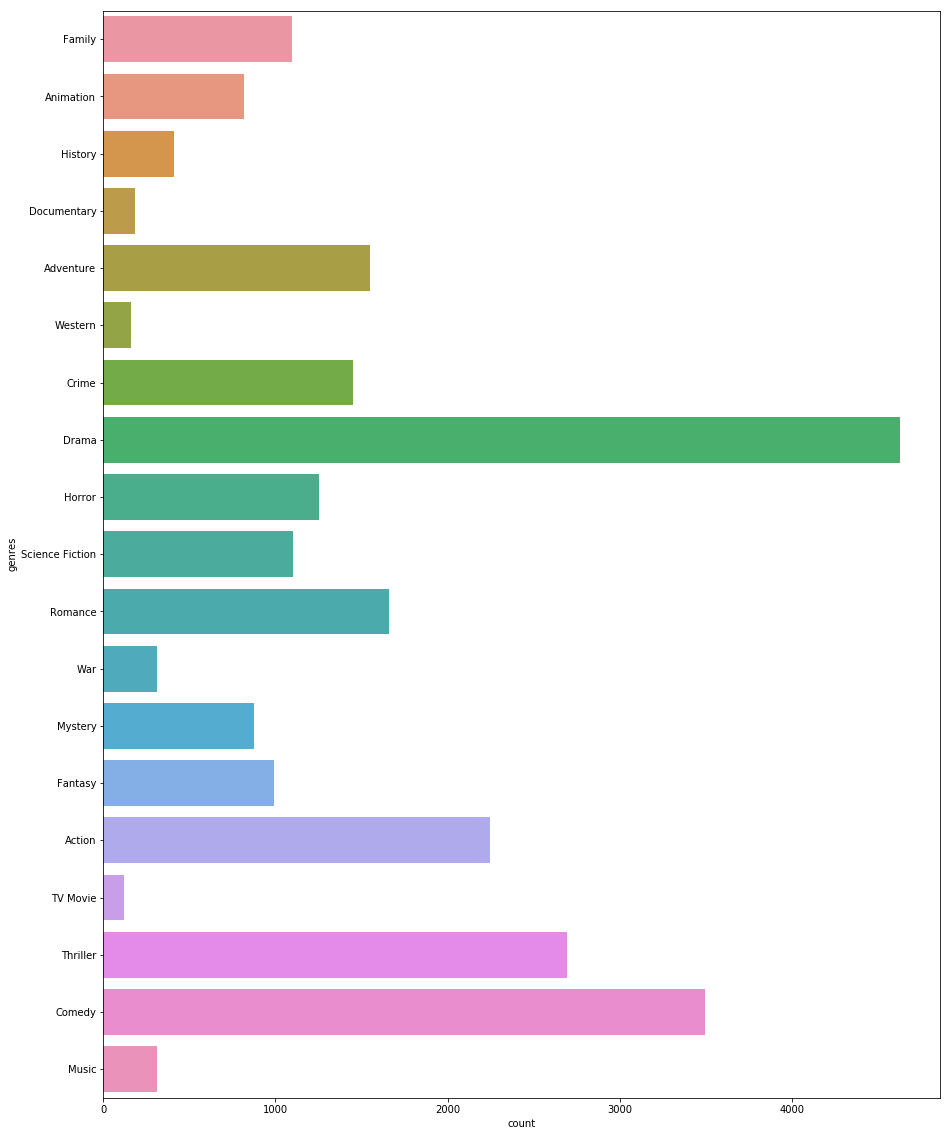

In [293]:
plt.figure(figsize=(15,20)) 
sns.barplot( x = 'count',y = 'genres', data=gct)